In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from helpers.create_histograms import *
from helpers.visualize_data import *

In [2]:
datadir_input = "data/raw_data/"
datadir_output = "data/generated_histograms/"

In [ ]:
# m_mumu energy interval (110.,160.) GeV for Higgs
x_range = (110, 160) # change this!

# if n_bins is an int, it defines the number of equal-width bins in the given range
# if n_bins is a sequence, it defines a monotonically increasing array of bin edges, allowing for non-uniform bin widths
n_bins = 60 # change this!

# filenames of downloaded input .h5 files
dataset_names = ["mc_bkg_new", "mc_sig", "data"]

# labels for file content
labels = ["Background", "Signal", "Data"]

# name of the saved histograms
save_hist_name = "my_hist"

# dictionary from labels to file names
hists_files = {label: f"{datadir_output}{save_hist_name}_{label}.npz" for label in labels}

# check if all histograms already exist
already_exists = all([os.path.isfile(f) for f in hists_files.values()])

# if not all histogram .npz files found, make histograms
if not already_exists:
    dirs = make_histograms(
        datadir_input,
        datadir_output,
        labels,
        dataset_names,
        n_bins,
        x_range=x_range,
        save_hist_name=save_hist_name,
    )

Loading data/raw_data/mc_bkg_new.h5...
Creating histogram for Background...
[1.23517338e+09 3.76841250e+04 3.86598291e+03 1.07286658e+03
 2.78672760e+02 6.91827545e+01 1.91496964e+02 1.24523077e+01
 7.11475849e+00 3.98552275e+00 1.63121355e+00 1.14439189e+00
 5.51817477e-01 6.24396324e-01 1.40256274e+00 2.03290507e-01
 1.36855674e+00 4.39708456e-02 5.58697544e-02 2.27963384e-02
 6.54950440e-02 5.31522743e-03 4.39288327e-03 6.35012100e-03
 3.88579327e-03 2.53681885e-03 6.83566649e-03 1.93327502e-03
 8.27580225e-03 2.92891148e-03 0.00000000e+00 4.28701867e-04
 3.57880228e-04 5.26900450e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.69504074e-05 3.44688451e-04 3.56913777e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.95157282e-04
 5.32256532e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.000000

In [16]:
def load_histogram(hist_file):
    with np.load(hist_file, "rb") as data:
        bin_edges = data["bin_edges"]
        bin_centers = data["bin_centers"]
        bin_values = data["bin_values"]
        bin_errors = data["bin_errors"]

    return {"centers": bin_centers, "edges": bin_edges, "values": bin_values, "errors": bin_errors}

In [17]:
hists = {}

for hist_label, hist_file in hists_files.items():
    hists[hist_label] = load_histogram(hist_file)

In [18]:
# we can now access histogram contents with label key and one of the histogram data keys
hists.keys(), hists["Background"].keys()

(dict_keys(['Background', 'Signal', 'Data']),
 dict_keys(['centers', 'edges', 'values', 'errors']))

c:\Users\tadej\Desktop\STUDIJ\mag-2.letnik\PSUF\PSUF1\python1\helpers\visualize_data.py:105: RuntimeWarning: divide by zero encountered in divide
  zvals = ys / bkgs
c:\Users\tadej\Desktop\STUDIJ\mag-2.letnik\PSUF\PSUF1\python1\helpers\visualize_data.py:105: RuntimeWarning: invalid value encountered in divide
  zvals = ys / bkgs
c:\Users\tadej\Desktop\STUDIJ\mag-2.letnik\PSUF\PSUF1\python1\helpers\visualize_data.py:106: RuntimeWarning: invalid value encountered in divide
  ry = yerrs / ys
c:\Users\tadej\Desktop\STUDIJ\mag-2.letnik\PSUF\PSUF1\python1\helpers\visualize_data.py:107: RuntimeWarning: invalid value encountered in divide
  rb = berrs / bkgs


ValueError: 'yerr' must not contain negative values

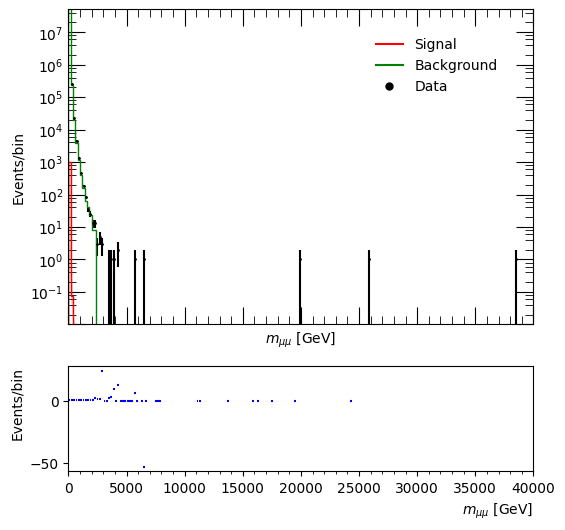

In [19]:
# using helpers
from helpers.visualize_data import visualize_histograms

visualize_histograms(hists.keys(), save_hist_name, "data/generated_histograms/", output_filename=None, save=False)
plt.tight_layout()